In [4]:
import numpy as np
import matplotlib.pyplot as plt

# sigmoid函数
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

In [5]:
def train_model(X, Y, a=0.1):
    '''
    这个函数用来训练模型,输入X的时候请注意，X的行应该是单个数据的维数，X的列应该是样本的个数
    参数X是训练的训练输入
    参数Y是训练的训练期望输出
    参数a是训练过程中的学习率
    '''
    # 先获取X矩阵的维数
    m = np.shape(X)[1]
    nx = np.shape(X)[0]
    print("the m is:" + str(m) + " the nx is:" + str(nx))
    
    # 初始化模型的参数
    W = np.zeros((nx, 1))
    b = 0
    
    # 这参数是用来存储b变化过程中的数据,用来显示梯度下降中b的变化过程
    bs = []
    
    # 对输入的训练集训练模型10000次
    for i in range(10000):
        
        # 计算模型输出
        Z = np.dot(W.T, X) + b
        A = sigmoid(Z)
        
        # 计算模型梯度
        dZ = A - Y
        dW = (np.dot(X, dZ.T))/m
        db = (np.sum(dZ))/m
        
        # 更新W和b的值
        W = W - a*dW
        b = b - a*db
        bs.append(b)
    plt.plot(bs)
    plt.show()
    return W, b

In [6]:
# 根据模型的输入值进行测试
def get_out(W, b, X):
    return sigmoid(np.dot(W.T, X) + b)

In [7]:
# 测试的数据集
test_input = np.array([[1, 2, 4], [4, 6, 8], [4, 5, 6], [3, 5, 9], [2, 4, 0], [9, 2, 7]])
test_output = np.array([1,0,0, 1, 1, 0,])

the m is:6 the nx is:3


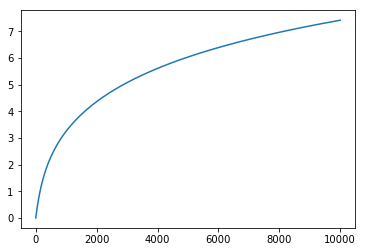

train model the W value is : [[-10.43190714]
 [  4.39141445]
 [  0.58922655]]
train model the b value is : 7.41004368793
use train model test the values is : [[  9.99701926e-01   3.71374146e-02   1.46967322e-04   9.66895893e-01
    9.83887040e-01   1.11965114e-32]]


In [8]:
W, b = train_model(test_input.T, test_output)
print("train model the W value is : " + str(W))
print("train model the b value is : " + str(b))
test_input = np.array([[1, 2, 4], [4, 6, 8], [4, 5, 6], [3, 5, 9], [2, 4, 0], [9, 2, 7]])
print("use train model test the values is : " + str(get_out(W, b, test_input.T)))

## 结论

可以看到我们用于训练和测试的数据是一样的，都是
    
    np.array([[1, 2, 4], [4, 6, 8], [4, 5, 6], [3, 5, 9], [2, 4, 0], [9, 2, 7]])

我们的期望输出是：

    np.array([1,0,0, 1, 1, 0,])

我们用我们训练好的模型去测试输入，得到的输出是：

    [ 0.999701926   0.0371374146  0.000146967322   0.966895893  0.983887040         0.000000000000000000000000000000111965114
如果按照四舍五入来进行计算的话就相当于：

    [1        0         0          1        1          0]
    
**我们发现，我们的模型和我们的期望值拟合的很好**正确率达到了100%

## 下面我们来看一下相对误差

In [9]:
relative_error = np.sum(np.abs(test_output - get_out(W, b, test_input.T)))/np.shape(test_output)[0]
print("相对误差:" + str(relative_error))

相对误差:0.0144665870313
